# Plot $x_B$ distribution of tagged and untagged events 
With background subtraction of tagged events, based on ToF

last edit July-7, 2022

## Imports and definitions

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data:
1 run of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$

In [9]:
load_SIDIS_data( Nruns = 1, do_e_e_pi=True, fdebug=1)

Done loading files.

Total statistics:
632087  (e,e'π+) events
56  (e,e'π+n) events
272140  (e,e'π-) events
23  (e,e'π-n) events


In [10]:
load_SIDIS_data( Nruns = -1, do_e_e_pi=False, fdebug=1)

Done loading files.

Total statistics:
4722  (e,e'π+n) events
1339  (e,e'π-n) events


## (2) Apply selection cuts not previously imposed
without the cut on $p_n > 0.275$ GeV/c

In [11]:
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(doApply_minPn_cut=False, 
                                                                             fdebug=2, 
                                                                             NeventsMax=-1);

Applying selection cuts not previously imposed
(1) DATA
(e,e'π)
Apply a π+/π- acceptance matching cut on the in p-theta plane
applying p-theta cut only to 632087 events
Apply a cut on the missing mass of a (e,e'π) reaction: 2.5<Mx<5.0 GeV/c2
(e,e π+ )
632087 events before cut
435535 events after p-theta cut (68.9 %)
393180 events after M_X cut (62.2 %)
(e,e π- )
272140 events before cut
263620 events after p-theta cut (96.9 %)
243676 events after M_X cut (89.5 %)
 
(e,e'πn)
Apply a π+/π- acceptance matching cut on the in p-theta plane
applying p-theta cut only to 4722 events
(e,e π+ )
4722 events before cut
4722 events after min p(n) cut (100.0 %)
4716 events after p-theta cut (99.9 %)
(e,e π- )
1339 events before cut
1339 events after min p(n) cut (100.0 %)
1339 events after p-theta cut (100.0 %)
 
Done applying selection cuts not previously imposed


## (3) Subdivide into bins of $x_B$ and plot $E_n$ distribution in each bin to estimate background
$ x_B = Q^2/2m_p\omega$

## (3.1) first plot $x_B$ distribution to choose binning

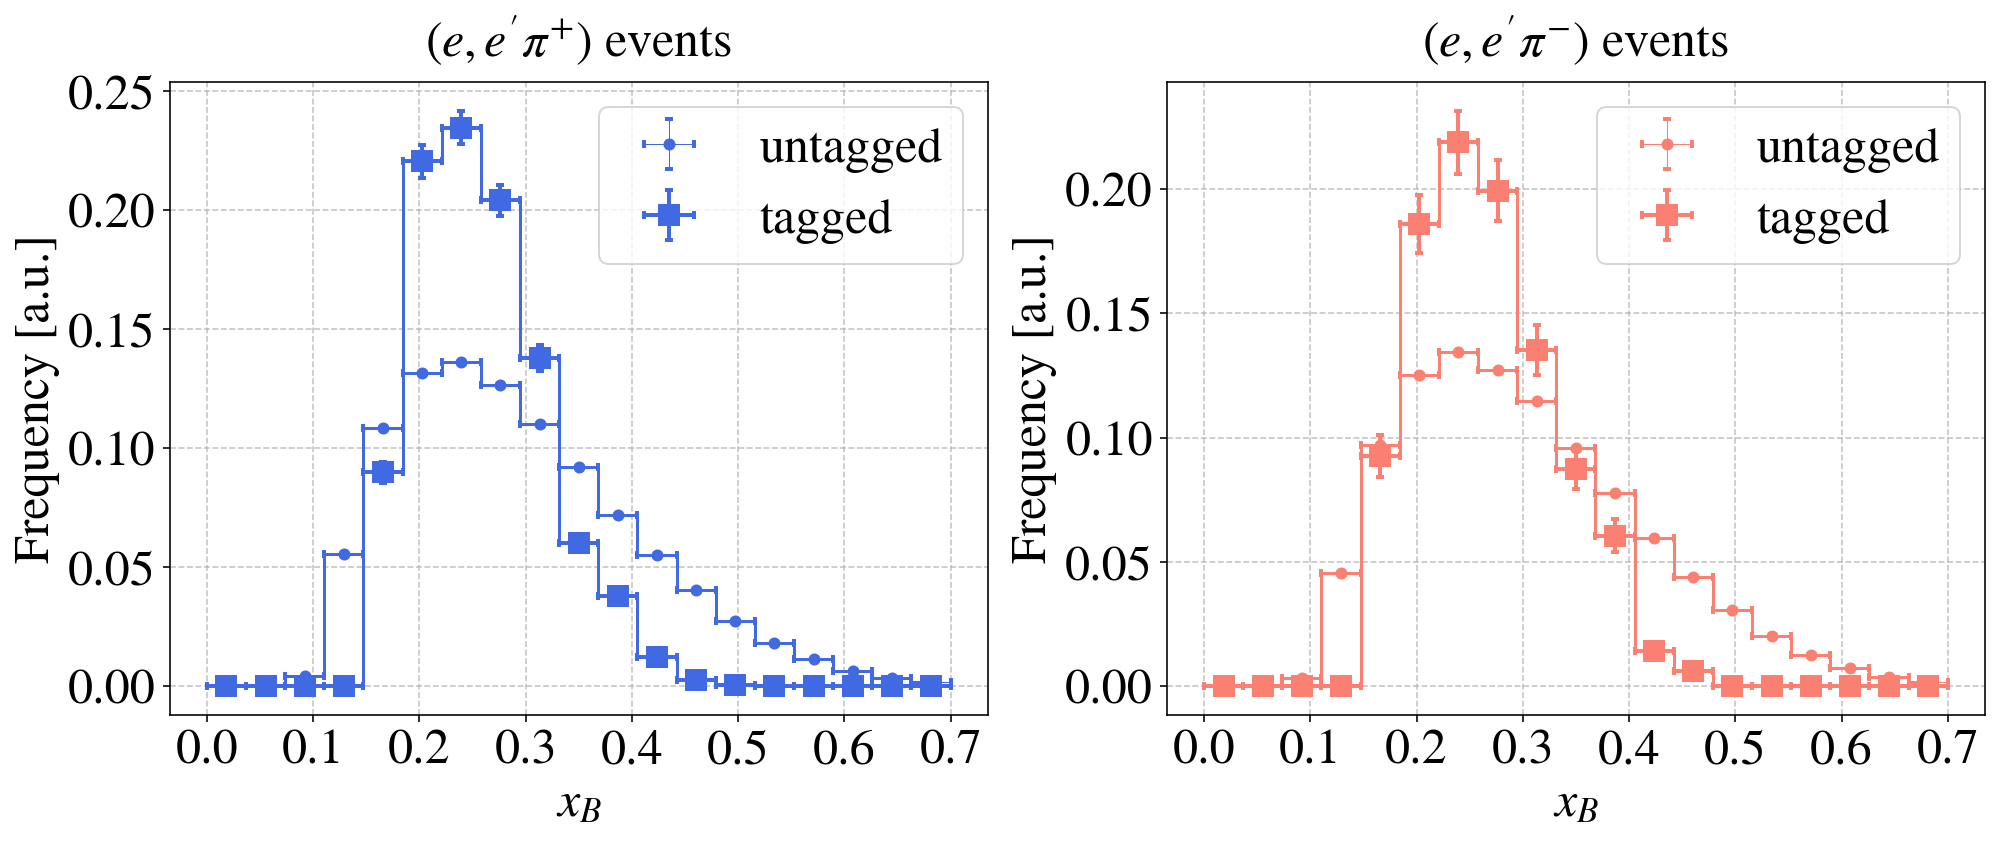

In [76]:
bins = np.linspace(0.,0.7,20)
fig = plt.figure(figsize=(14,6))

for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    
    df = e_e_pi_pass_cuts[pi_ch]
    plot_step_hist( df.xB, bins=bins, marker='o', linewidth=0.5, color=pi_color,label='untagged', alpha=1, density=True)

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df.xB, bins=bins, marker='s', markersize=10, color=pi_color,label='tagged', alpha=1, density=True)

    set_axes(ax,'$x_B$','Frequency [a.u.]', 
             title="$(e,e'"+pi_label+")$ events",
             do_add_grid=True, do_add_legend=True)
plt.tight_layout()

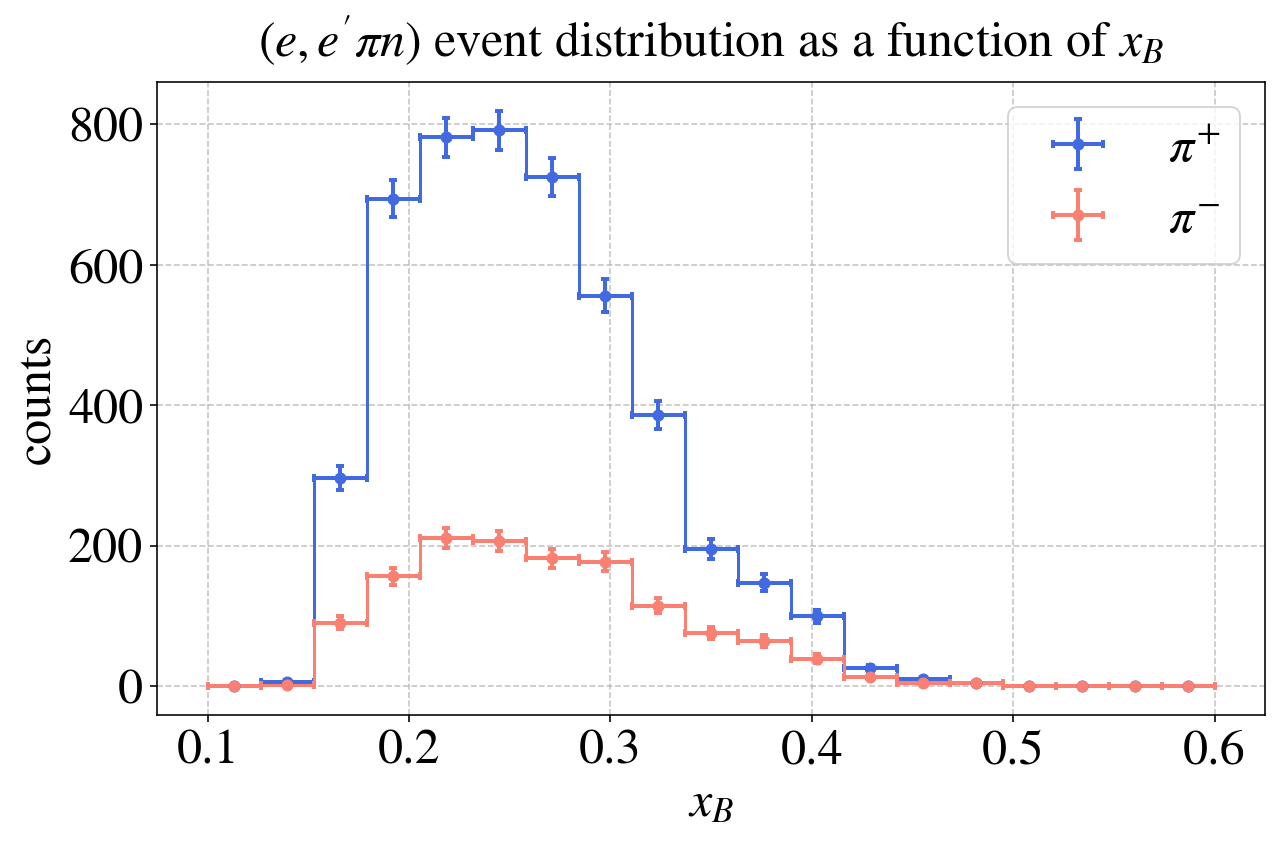

In [65]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
for pi_ch,pi_print,pi_label,pi_color in zip(pi_charge_names,pi_prints,pi_labels,pi_colors):
    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df.xB, bins=np.linspace(0.1,0.6,20) , color=pi_color,label='$'+pi_label+'$')
set_axes(ax,'$x_B$','counts', title="$(e,e'\pi n)$ event distribution as a function of $x_B$", do_add_grid=True, do_add_legend=True)
plt.tight_layout()

## (3.2) now choose binning and plot $p_n$ distribution in each bin 

In [60]:
x_bins   = np.linspace(0.2,0.5,6)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
Nbins    = len(x_bins)
x_bins

array([0.2 , 0.26, 0.32, 0.38, 0.44, 0.5 ])

In [61]:
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_44108/2570688738.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax  = fig.add_subplot(2,Nbins/2,bin_idx+1)


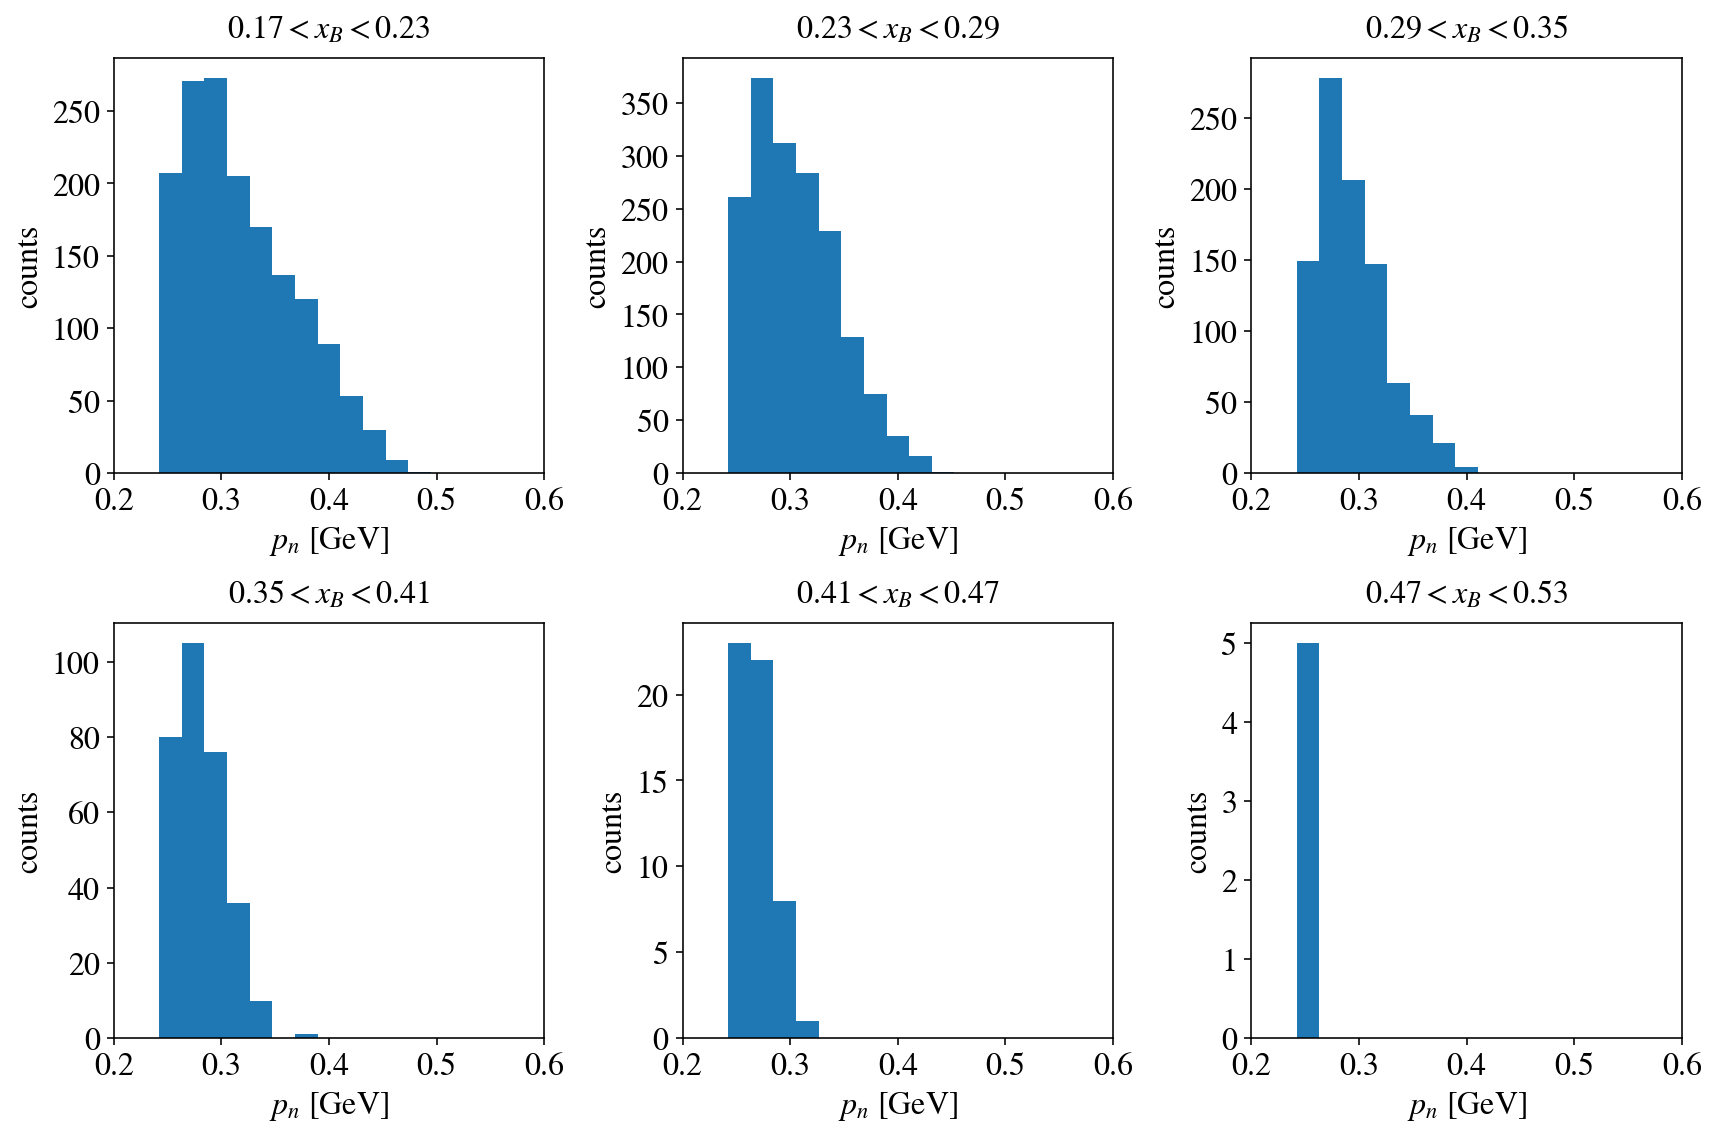

In [63]:
fig = plt.figure(figsize=(12,8))
pi_ch = 'piplus'
for bin_idx in range(Nbins):
    x_min, x_max  = x_bins[bin_idx] - x_err[1], x_bins[bin_idx] + x_err[1]
    # df = e_e_pi_pass_cuts[pi_ch];
    # eepi_in_bin   = df[ (x_min < df.xB ) & (df.xB < x_max )]

    df = e_e_pi_n_pass_cuts[pi_ch];
    eepi_n_in_bin = df[ (x_min < df.xB ) & (df.xB < x_max )]

    ax  = fig.add_subplot(2,Nbins/2,bin_idx+1)
    ax.hist( eepi_n_in_bin.n_P, bins=np.linspace(0.2,0.6,20) )
    set_axes(ax,'$p_n$ [GeV]','counts', title='$%.2f < x_B < %.2f$'%(x_min,x_max), xlim=(0.2,0.6),fontsize=16);

plt.tight_layout()

# Add two lines indicating the cut boundaries
# estimate background from distribution outside the cut region

# (4) Other kinematical variables like $Q^2$ and $W$

In [40]:
np.min(df.xB)

0.151266691

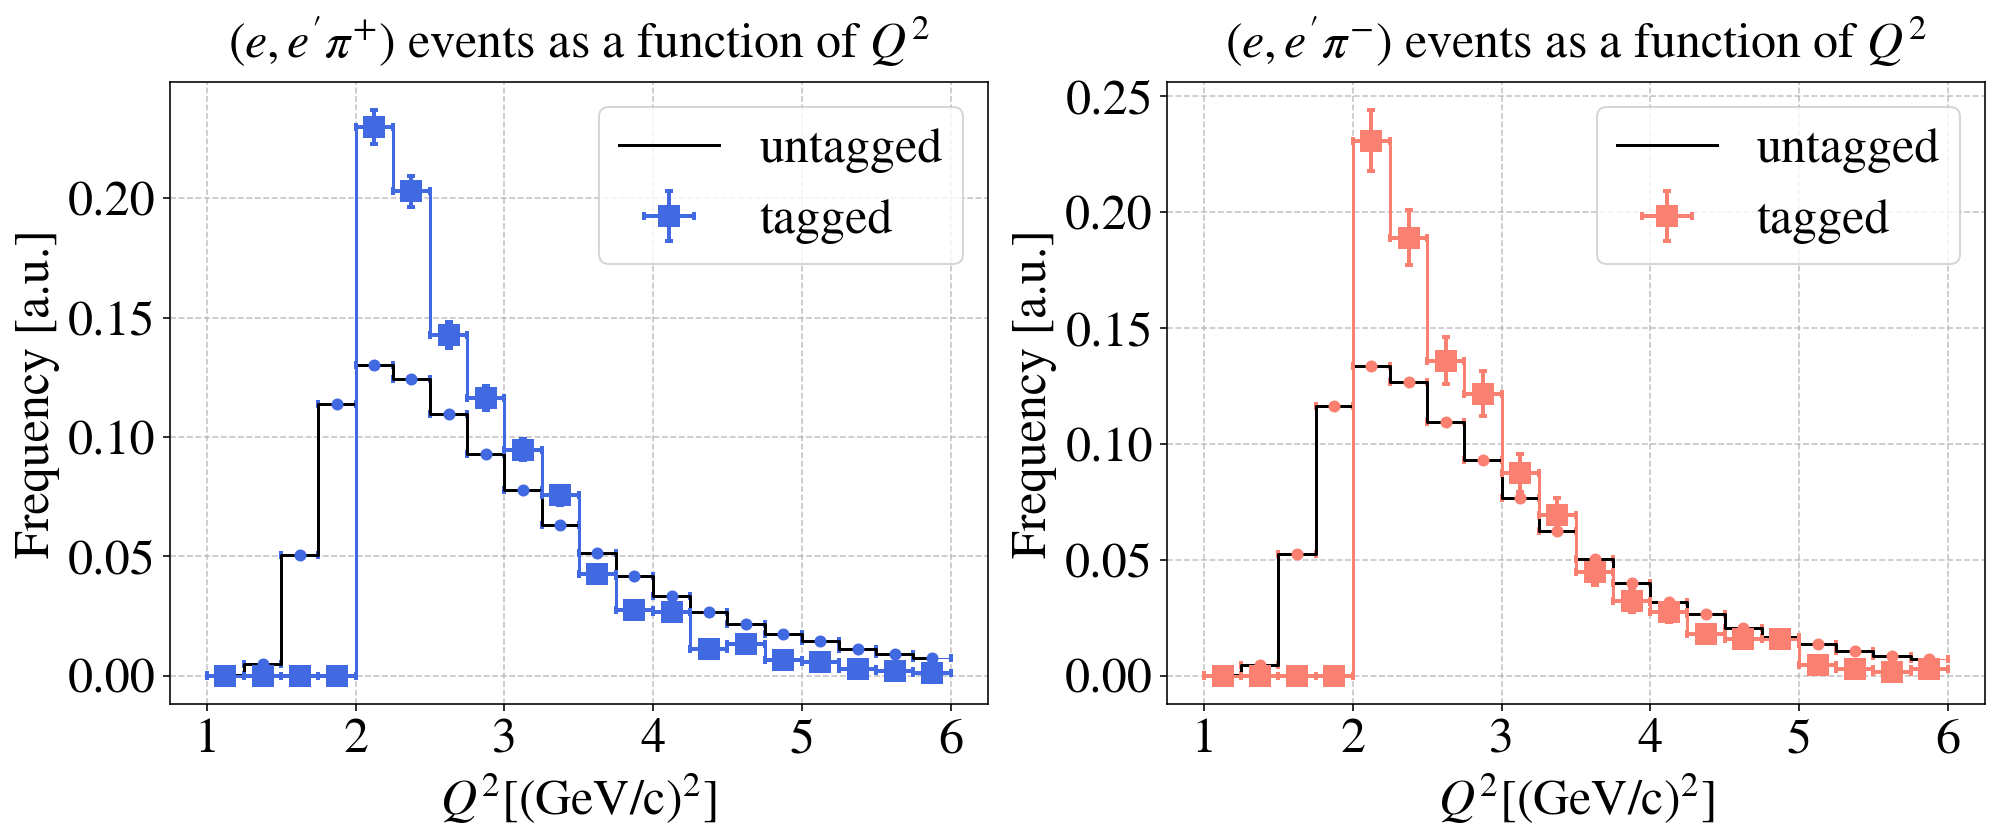

In [41]:
var  = 'Q2'
bins = np.linspace(1.,6,21)
varlabel = '$Q^2$'
varunits = '[(GeV/c)$^2$]'

fig = plt.figure(figsize=(14,6))

for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    
    df = e_e_pi_pass_cuts[pi_ch]
    x,h,_,_ = plot_step_hist( df[var], bins=bins, marker='o', 
                             linewidth=0.5, color=pi_color,label=None, alpha=1, density=True)
    ax.step(x,h,'-k',where='mid',label='untagged', )

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df[var], bins=bins, marker='s', markersize=10, color=pi_color,label='tagged', alpha=1, density=True)

    set_axes(ax,varlabel+varunits,'Frequency [a.u.]', 
             title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
             do_add_grid=True, do_add_legend=True)
plt.tight_layout()

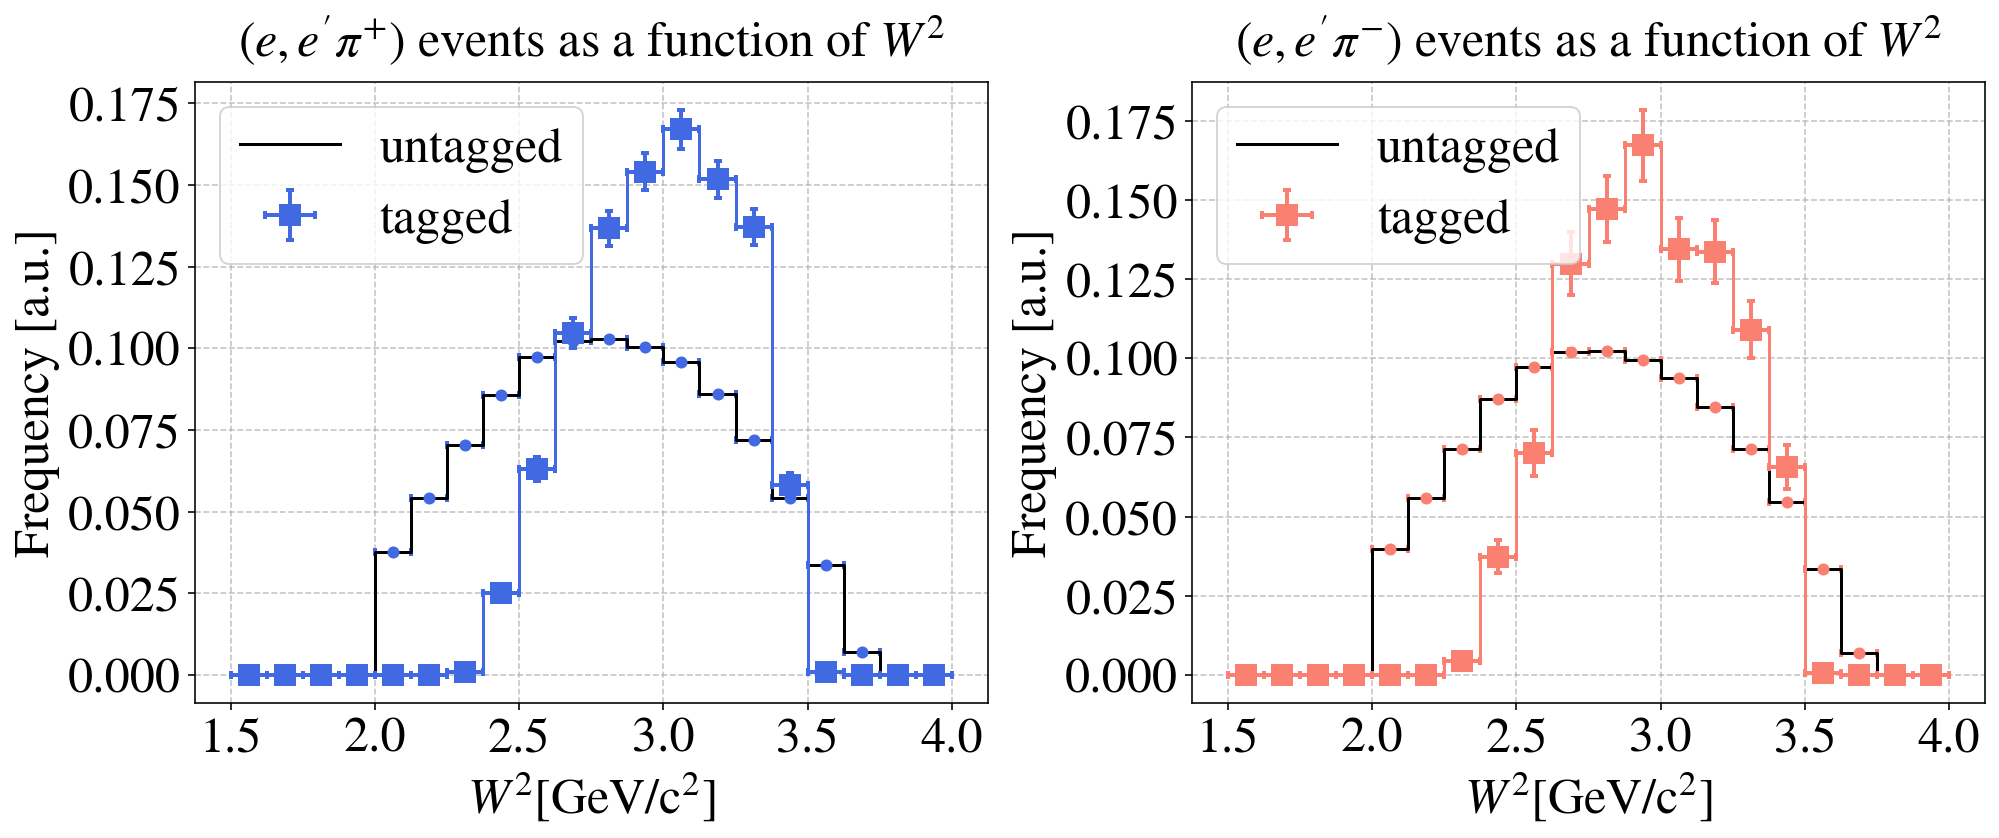

In [34]:
var  = 'W'
bins = np.linspace(1.5,4,21)
varlabel = '$W^2$'
varunits = '[GeV/c$^2$]'

fig = plt.figure(figsize=(14,6))

for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    
    df = e_e_pi_pass_cuts[pi_ch]
    x,h,_,_ = plot_step_hist( df[var], bins=bins, marker='o', 
                             linewidth=0.5, color=pi_color,label=None, alpha=1, density=True)
    ax.step(x,h,'-k',where='mid',label='untagged', )

    df = e_e_pi_n_pass_cuts[pi_ch]
    plot_step_hist( df[var], bins=bins, marker='s', markersize=10, color=pi_color,label='tagged', alpha=1, density=True)

    set_axes(ax,varlabel+varunits,'Frequency [a.u.]', 
             title="$(e,e'"+pi_label+")$ events as a function of "+varlabel,
             do_add_grid=True, do_add_legend=True)
plt.tight_layout()

# (4) Save results to file

In [ ]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/'
results_data_path = main_data_path + '/' + 'Results' + '/'
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims[z_bin]
    y_err_up = Rpips2pims_errup[z_bin]
    y_err_dw = Rpips2pims_errdw[z_bin]
    df_to_save = pd.DataFrame({"$x_B$":x,"$\Delta x_B$":x_err,
                               '$R$':y,
                               '$\Delta R_{+}$':y_err_up,'$\Delta R_{-}$':y_err_dw})
    print('$z=%.2f\pm%.2f$'%(z_bin,z_width))
    filelabel = 'z_%.2f-%.2f'%(z_bin-z_width,z_bin+z_width)
    filename  =  results_data_path + 'Untagged_SIDIS_ratio_' + filelabel + '.csv'
    print(filename)
    
    display(df_to_save)
    # df_to_save.to_csv(filename)
    # print('saved',filename)